store--->:  no
entered True line
Year 2013: 12271
Year 2014: 43796
Year 2015: 39362
Montag: 11099
Dienstag: 12309
Mittwoch: 13060
Donnerstag: 13113
Freitag: 15680
Samstag: 20831
Sonntag: 9337
MonthJanTotal: 8038
MonthFebTotal: 6983
MonthMarTotal: 8142
MonthAprTotal: 7264
MonthMayTotal: 7927
MonthJunTotal: 6936
MonthJulTotal: 7314
MonthAugTotal: 7535
MonthSepTotal: 6932
MonthOctTotal: 11742
MonthNovTotal: 9410
MonthDecTotal: 7206
CALAMARI Inventory: 3232
FISCH Inventory: 3562
GARNELEN Inventory: 7615
HAEHNCHEN Inventory: 23101
KOEFTE Inventory: 16788
LAMM Inventory: 24046
STEAK Inventory: 17085
TOTAL_FISCHPROD Inventory: 14409
TOTAL_FLEISCH Inventory: 81020


,Sr.No.,DEMAND_DATE,Montag,Dienstag,Mittwoch,Donnerstag,Freitag,Samstag,Sonntag,MONTH_JAN,MONTH_FEB,MONTH_MAR,MONTH_APR,MONTH_MAY,MONTH_JUN,MONTH_JUL,MONTH_AUG,MONTH_SEP,MONTH_OCT,MONTH_NOV,MONTH_DEC,YEAR_2013,YEAR_2014,YEAR_2015,CALAMARI,FISCH,GARNELEN,HAEHNCHEN,KOEFTE,LAMM,STEAK,TOTAL_FISCHPROD,TOTAL_FLEISCH,TOTAL,CALAMARI_DEMAND_T1,CALAMARI_DEMAND_T2,CALAMARI_DEMAND_T3,CALAMARI_DEMAND_T4,CALAMARI_DEMAND_T5,CALAMARI_DEMAND_T6,CALAMARI_DEMAND_T7,FISCH_DEMAND_T1,FISCH_DEMAND_T2,FISCH_DEMAND_T3,FISCH_DEMAND_T4,FISCH_DEMAND_T5,FISCH_DEMAND_T6,FISCH_DEMAND_T7,GARNELEN_DEMAND_T1,GARNELEN_DEMAND_T2,GARNELEN_DEMAND_T3,GARNELEN_DEMAND_T4,GARNELEN_DEMAND_T5,GARNELEN_DEMAND_T6,GARNELEN_DEMAND_T7,HAEHNCHEN_DEMAND_T1,HAEHNCHEN_DEMAND_T2,HAEHNCHEN_DEMAND_T3,HAEHNCHEN_DEMAND_T4,HAEHNCHEN_DEMAND_T5,HAEHNCHEN_DEMAND_T6,HAEHNCHEN_DEMAND_T7,KOEFTE_DEMAND_T1,KOEFTE_DEMAND_T2,KOEFTE_DEMAND_T3,KOEFTE_DEMAND_T4,KOEFTE_DEMAND_T5,KOEFTE_DEMAND_T6,KOEFTE_DEMAND_T7,LAMM_DEMAND_T1,LAMM_DEMAND_T2,LAMM_DEMAND_T3,LAMM_DEMAND_T4,LAMM_DEMAND_T5,LAMM_DEMAND_T6,LAMM_DEMAND_T7,STEAK_DEMAND_T1,STEAK_DEMAND_T2,STEAK_DEMAND_T3,STEAK_DEMAND_T4,STEAK_DEMAND_T5,STEAK_DEMAND_T6,STEAK_DEMAND_T7,TOTAL_FISCHPROD_DEMAND_T1,TOTAL_FISCHPROD_DEMAND_T2,TOTAL_FISCHPROD_DEMAND_T3,TOTAL_FISCHPROD_DEMAND_T4,TOTAL_FISCHPROD_DEMAND_T5,TOTAL_FISCHPROD_DEMAND_T6,TOTAL_FISCHPROD_DEMAND_T7,TOTAL_FLEISCH_DEMAND_T1,TOTAL_FLEISCH_DEMAND_T2,TOTAL_FLEISCH_DEMAND_T3,TOTAL_FLEISCH_DEMAND_T4,TOTAL_FLEISCH_DEMAND_T5,TOTAL_FLEISCH_DEMAND_T6,TOTAL_FLEISCH_DEMAND_T7,TOTAL_DEMAND_T1,TOTAL_DEMAND_T2,TOTAL_DEMAND_T3,TOTAL_DEMAND_T4,TOTAL_DEMAND_T5,TOTAL_DEMAND_T6,TOTAL_DEMAND_T7,CALAMARI_CUM_DEMAND_T2,CALAMARI_CUM_DEMAND_T3,CALAMARI_CUM_DEMAND_T4,CALAMARI_CUM_DEMAND_T5,CALAMARI_CUM_DEMAND_T6,CALAMARI_CUM_DEMAND_T7,FISCH_CUM_DEMAND_T2,FISCH_CUM_DEMAND_T3,FISCH_CUM_DEMAND_T4,FISCH_CUM_DEMAND_T5,FISCH_CUM_DEMAND_T6,FISCH_CUM_DEMAND_T7,GARNELEN_CUM_DEMAND_T2,GARNELEN_CUM_DEMAND_T3,GARNELEN_CUM_DEMAND_T4,GARNELEN_CUM_DEMAND_T5,GARNELEN_CUM_DEMAND_T6,GARNELEN_CUM_DEMAND_T7,HAEHNCHEN_CUM_DEMAND_T2,HAEHNCHEN_CUM_DEMAND_T3,HAEHNCHEN_CUM_DEMAND_T4,HAEHNCHEN_CUM_DEMAND_T5,HAEHNCHEN_CUM_DEMAND_T6,HAEHNCHEN_CUM_DEMAND_T7,KOEFTE_CUM_DEMAND_T2,KOEFTE_CUM_DEMAND_T3,KOEFTE_CUM_DEMAND_T4,KOEFTE_CUM_DEMAND_T5,KOEFTE_CUM_DEMAND_T6,KOEFTE_CUM_DEMAND_T7,LAMM_CUM_DEMAND_T2,LAMM_CUM_DEMAND_T3,LAMM_CUM_DEMAND_T4,LAMM_CUM_DEMAND_T5,LAMM_CUM_DEMAND_T6,LAMM_CUM_DEMAND_T7,STEAK_CUM_DEMAND_T2,STEAK_CUM_DEMAND_T3,STEAK_CUM_DEMAND_T4,STEAK_CUM_DEMAND_T5,STEAK_CUM_DEMAND_T6,STEAK_CUM_DEMAND_T7,TOTAL_FISCHPROD_CUM_DEMAND_T2,TOTAL_FISCHPROD_CUM_DEMAND_T3,TOTAL_FISCHPROD_CUM_DEMAND_T4,TOTAL_FISCHPROD_CUM_DEMAND_T5,TOTAL_FISCHPROD_CUM_DEMAND_T6,TOTAL_FISCHPROD_CUM_DEMAND_T7,TOTAL_FLEISCH_CUM_DEMAND_T2,TOTAL_FLEISCH_CUM_DEMAND_T3,TOTAL_FLEISCH_CUM_DEMAND_T4,TOTAL_FLEISCH_CUM_DEMAND_T5,TOTAL_FLEISCH_CUM_DEMAND_T6,TOTAL_FLEISCH_CUM_DEMAND_T7,TOTAL_CUM_DEMAND_T2,TOTAL_CUM_DEMAND_T3,TOTAL_CUM_DEMAND_T4,TOTAL_CUM_DEMAND_T5,TOTAL_CUM_DEMAND_T6,TOTAL_CUM_DEMAND_T7,CALAMARI_HML_DEMAND_T7,FISCH_HML_DEMAND_T7,GARNELEN_HML_DEMAND_T7,HAEHNCHEN_HML_DEMAND_T7,KOEFTE_HML_DEMAND_T7,LAMM_HML_DEMAND_T7,STEAK_HML_DEMAND_T7,TOTAL_FISCHPROD_HML_DEMAND_T7,TOTAL_FLEISCH_HML_DEMAND_T7,TOTAL_HML_DEMAND_T7,CALAMARI_NO_DAYS_ABOVE_7D_MEAN,FISCH_NO_DAYS_ABOVE_7D_MEAN,GARNELEN_NO_DAYS_ABOVE_7D_MEAN,HAEHNCHEN_NO_DAYS_ABOVE_7D_MEAN,KOEFTE_NO_DAYS_ABOVE_7D_MEAN,LAMM_NO_DAYS_ABOVE_7D_MEAN,STEAK_NO_DAYS_ABOVE_7D_MEAN,TOTAL_FISCHPROD_NO_DAYS_ABOVE_7D_MEAN,TOTAL_FLEISCH_NO_DAYS_ABOVE_7D_MEAN,TOTAL_NO_DAYS_ABOVE_7D_MEAN,CALAMARI_NO_DAYS_BELOW_7D_MEAN,FISCH_NO_DAYS_BELOW_7D_MEAN,GARNELEN_NO_DAYS_BELOW_7D_MEAN,HAEHNCHEN_NO_DAYS_BELOW_7D_MEAN,KOEFTE_NO_DAYS_BELOW_7D_MEAN,LAMM_NO_DAYS_BELOW_7D_MEAN,STEAK_NO_DAYS_BELOW_7D_MEAN,TOTAL_FISCHPROD_NO_DAYS_BELOW_7D_MEAN,TOTAL_FLEISCH_NO_DAYS_BELOW_7D_MEAN,TOTAL_NO_DAYS_BELOW_7D_MEAN,CALAMARI_MEAN_SAME_WDAY_DEMANDS_W2,CALAMARI_MEAN_SAME_WDAY_DEMANDS_W3,CALAMARI_MEAN_SAME_WDAY_DEMANDS_W4,FISCH_MEAN_SAME_WDAY_DEMANDS_W2,FISCH_MEAN_SAME_W

monday's demand:  161
tuesday's demand:  161
wednesday's demand:  161
thursday's demand:  160
friday's demand:  160
saturday's demand:  162
scaled demand--->
monday's demand:  16
tuesday's demand:  16
wednesday's demand:  16
thursday's demand:  16
friday's demand:  16
saturday's demand:  16


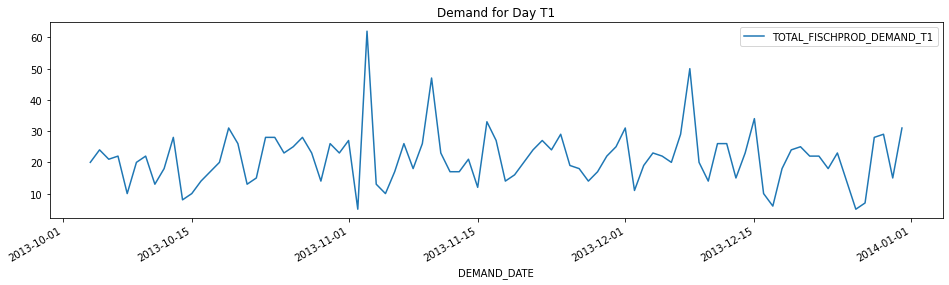

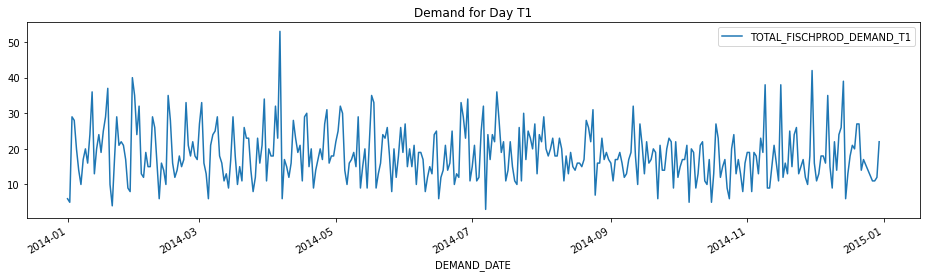

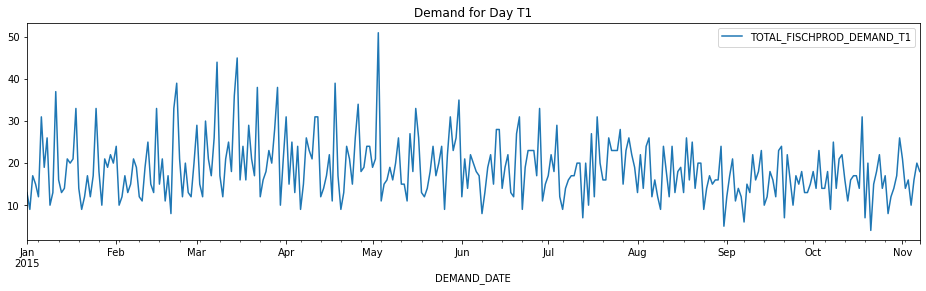

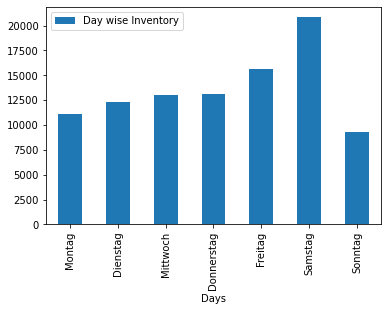

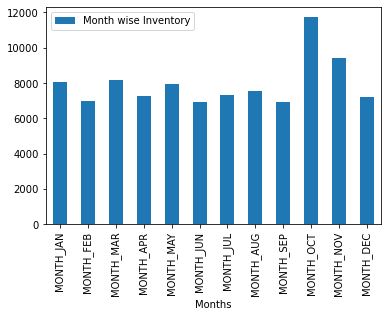

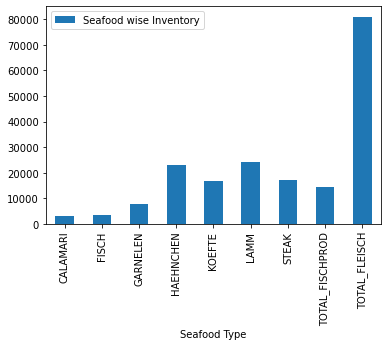

In [1]:
from Inventory_Environment_v1 import Env
import collections
import numpy as np
import random
import pickle

import jproperties
from jproperties import Properties


from datetime import datetime
start_time = datetime.now()
# do your work here


### Create an empty Q-Dictionary if it does not exist:

In [2]:
m=50

In [3]:
Q_dict = collections.defaultdict(dict)
States_track = collections.defaultdict(dict)
rewards_tracked = {(15,0):[],(25,1):[], (20,2): [], (30,3):[], (35,4):[], (10,5):[],(50,6):[]}

# print(len(Q_dict))
# print(len(rewards_tracked))
# print(len(States_track))

### Import the latest dictionary if Q-Dictionary already exists:

In [4]:
with open('PolicyNew.pkl', 'rb') as handle:
    Q_dict = pickle.load(handle)
    
with open('RewardsNew.pkl', 'rb') as handle:
    rewards_tracked = pickle.load(handle)    

with open('States_trackedNew.pkl', 'rb') as handle:
    States_track = pickle.load(handle)    
    
print(len(Q_dict))
print(len(rewards_tracked))
print(len(States_track))

357
7
7


In [5]:
#function to return valid actions

def valid_actions(state):
    
    state = int(state[0])
    valid_Actions = []
    
    for ix in range(0,m+1):
        valid_Actions.append(ix)
    return valid_Actions

In [6]:
#function to add Q-values to Q-dictionary

def add_to_dict(state,valid_act):
    
    if state not in Q_dict.keys():
        Q_dict[state] = {}
        for action in valid_act:
            Q_dict[state][action] = 0.0

In [7]:
#function to save Q-dictionary as a pickle file

def save_obj(obj, objname ):
    with open(objname + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

In [8]:
#function to initialise Q-values
def initialise_tracking_states():
    sample_q_values = [((15,0),12),((25,1),25),((20,2),10),((30,3),30),((35,4),15),((10,5),18),((50,6),10)]    #select any 4 Q-values
    for q_values in sample_q_values:
        state = q_values[0]
        action = q_values[1]
        States_track[state][action] = []    #this is an array which will have appended values of that state-action pair for every 2000th episode         

In [9]:
#function to append latest Q-values of the 4 Q-values

def save_tracking_states():
    for st in States_track.keys():
        for action in States_track[st].keys():
            if st in Q_dict and action in Q_dict[st]:
                States_track[st][action].append(Q_dict[st][action])            

In [10]:
def epsilon_greedy(state, time):
    epsilon = - 1/ (1 + np.exp((-time+7500000)/1700000)) + 1
    z = np.random.random()
        
    if z > epsilon:
        action = max(Q_dict[state],key=Q_dict[state].get)   #Exploitation: this gets the action for max q-value of current state
    else:
        action = np.random.choice(np.arange(0,m+1))    #Exploration: randomly chose the action
    
    return action

### Training

In [11]:
#Parameters

# EPISODES = 1
EPISODES = 300000  #300000 Episodes for Convergence Analysis Testing
# STEPS = 1
STEPS = 30                 
LR = 0.01                   #learning rate
GAMMA = 0.91


threshold = 2000       # Q-values: stored/appended (convergence graphs)
#threshold = 1
policy_threshold = 30000    #every these many episodes, the Q-dict will be updated
#policy_threshold = 3

In [12]:
IsStore = "yes"
configs = Properties()
with open('keywords.properties', 'rb') as read_prop:
    configs.load(read_prop)
    
prop_view = configs.items()
for item in prop_view:
    if ((item[0]) == "IsStore"):
        IsStore = item[1].data

In [13]:
def training():
    for episode in range(0,EPISODES):
    
        env = Env()      #creating an instance of the class
        #this initialises the state and parameters to initial value for new episode
        
#         print("env.IsStore: ",env.IsStore)
#         print("IsStore: ",IsStore)
        if(env.IsStore == IsStore):
#             print("===============START====================")
#             print("Entered program after store check.........")
            initial_state = env.state    #tracking reward
            curr_state = env.state       #start is day's evening for action
            #curr_state is state_mon

#             print("DEBUG: curr_state post store check------------->: ",curr_state)
#             print("DEBUG: initial_state post store check---------->: ",initial_state)
            add_to_dict(curr_state,valid_actions(curr_state))

            #reward is not for the immediately next day
            time_step = 0
            reward = None
            curr_action = np.random.choice(np.arange(0,m+1))    #randomly choosing and action
                           
#             print("===============NEXT====================")    
#             print("DEBUG: curr_action after getting from random choice------------>: ",curr_action)
                
            next_state = env.initial_step(curr_state, curr_action)   #returned state_tue
            add_to_dict(next_state,valid_actions(next_state))
            
            curr_state = next_state       
            #note that curr_state is always earlier day evening's stock
            
            total_reward = 0
            
#             print("===============NEXT====================")    
#             print("DEBUG: after making next_state as curr_state. next_state obtained from initial_step------------>: ")
            
#             print("DEBUG: time_step----------------->:",time_step)
#             print("DEBUG: STEPS--------------------->:",STEPS)
#             print("DEBUG: next_state----------------->:",next_state)
#             print("DEBUG: curr_state----------------->:",curr_state)
#             print("DEBUG: before loop---------------->:")
            
            while time_step < STEPS:    #episode runs for a few steps

#                 print("===============NEXT====================")
#                 print("===============when time_step is less than STEPS====================")
#                 print("DEBUG: time_step----------------->:",time_step)
#                 print("DEBUG: STEPS----------------->:",STEPS)                
#                 print("DEBUG: curr_action----------------->:",curr_action)
#                 print("DEBUG: curr_state--------------------->:",curr_state)
#                 print("DEBUG: episode--------------------->:",episode)
                
                curr_action = epsilon_greedy(curr_state, episode)
                next_state, reward = env.step(curr_state, curr_action)
                add_to_dict(next_state,valid_actions(next_state))

                #update
                max_next = max(Q_dict[next_state],key=Q_dict[next_state].get)   #action corresponding to max q-value of next state
                Q_dict[curr_state][curr_action] += LR * ((reward + (GAMMA*(Q_dict[next_state][max_next]))) - Q_dict[curr_state][curr_action] ) 


                curr_state = next_state
                total_reward += reward
                time_step += 1
                
#                 print("===============NEXT====================") 
                   

#                 print("DEBUG: curr_state----------------->:",curr_state)
#                 print("DEBUG: curr_action---------------->:",curr_action)
#                 print("DEBUG: episode-------------------->:",episode)    
#                 print("DEBUG: next_state--------------------->:",next_state)
#                 print("DEBUG: total_reward--------------------->:",total_reward)
#                 print("DEBUG: reward--------------------->:",reward)
#                 print("DEBUG: time_step--------------------->:",time_step)
#                 print("DEBUG: before tracking awards")                
                    

            #TRACKING REWARDS as per threshold levels
            if initial_state in rewards_tracked:
                rewards_tracked[initial_state].append(total_reward)
                save_obj(rewards_tracked,'RewardsNew')

            if ((episode+1) % threshold) == 0:
                save_obj(rewards_tracked,'RewardsNew')   

            #TRACKING Q-VALUES
            if (episode == threshold-1):
                initialise_tracking_states()

            if ((episode+1) % threshold) == 0:
                save_tracking_states()
                save_obj(States_track,'States_trackedNew')   

            #SAVING POLICY
            if ((episode+1)% policy_threshold ) == 0:  #every 30000th episodes, the Q-dict will be saved
                save_obj(Q_dict,'PolicyNew')    
    return episode, total_reward

save_obj(rewards_tracked,'RewardsNew')   
save_obj(States_track,'States_trackedNew')   
save_obj(Q_dict,'PolicyNew')

In [14]:
# Training
training()

(299999, -1612.0224999999998)

In [15]:
save_obj(rewards_tracked,'RewardsNew')   
save_obj(States_track,'States_trackedNew')   
save_obj(Q_dict,'PolicyNew')      

### Checking Values

In [16]:
Q_dict

defaultdict(dict,
            {(19, 2): {0: -315.169411825011,
              1: -322.3516259046661,
              2: -324.0900765172773,
              3: -320.8916565225148,
              4: -322.73641568781443,
              5: -323.7240295418727,
              6: -322.48266927690946,
              7: -319.5067991276861,
              8: -317.9313436232055,
              9: -322.7571915674213,
              10: -317.51871964271123,
              11: -319.09173201072474,
              12: -318.69840358733694,
              13: -316.91851944059385,
              14: -315.1429510492842,
              15: -315.55205857546844,
              16: -314.74630968320224,
              17: -313.0474020085688,
              18: -309.78227058590073,
              19: -313.07080079802813,
              20: -315.0750153134426,
              21: -312.5702530654013,
              22: -313.15666187038016,
              23: -310.5411797323878,
              24: -309.74377817885227,
              25: -309

In [17]:
States_track

defaultdict(dict,
            {(15,
              0): {12: [-173.59283322326755,
               -175.06865260836202,
               -175.56795404149506,
               -176.5775351340451,
               -177.57513342671166,
               -180.07233441893493,
               -180.07233441893493,
               -181.60795163320702,
               -182.63110601056124,
               -184.14679537237868,
               -186.61634156474886,
               -188.52590795324843,
               -191.34094265576314,
               -193.59590005774606,
               -194.49449677207824,
               -195.8602589576466,
               -198.09581648372267,
               -199.434382725438,
               -201.20940435622003,
               -201.6421216257638,
               -204.2442629652002,
               -204.67524039792832,
               -207.21945430173008,
               -208.86563958495228,
               -209.70376843924097,
               -210.5383068472967,
               -210.961294

In [26]:
rewards_tracked[(10,5)][-10:]

[-1824.85,
 -1755.5675,
 -1829.9775,
 -1791.0049999999997,
 -1729.6900000000003,
 -1832.8199999999997,
 -1830.8349999999998,
 -1745.75,
 -1680.94,
 -1492.1425]

In [27]:
rewards_tracked[(10,5)][0:10]

[-1626.7175000000002,
 -1597.0725000000002,
 -1591.9724999999999,
 -1841.5900000000001,
 -1633.0849999999996,
 -1887.8225000000002,
 -1612.0024999999998,
 -1886.735,
 -1612.9925000000003,
 -1849.9375000000005]

In [19]:
rewards_tracked

{(15, 0): [-1913.1699999999998,
  -1916.0599999999997,
  -1850.2075000000002,
  -1718.3449999999996,
  -1780.2524999999996,
  -1702.2175000000002,
  -1797.2925000000005,
  -1672.6424999999995,
  -1771.1125,
  -1635.4325,
  -1894.2350000000001,
  -2090.8450000000003,
  -1747.5524999999996,
  -1787.2949999999998,
  -1705.4775000000002,
  -1770.3975,
  -1621.3124999999998,
  -1697.3100000000002,
  -1854.0499999999997,
  -1832.2699999999998,
  -1881.2,
  -1528.6499999999999,
  -1777.16,
  -1825.1574999999998,
  -1749.4774999999997,
  -1775.305,
  -1749.4299999999998,
  -1795.3825,
  -1759.245,
  -1763.375,
  -1820.0825000000002,
  -1767.1475000000003,
  -1815.1225,
  -2041.06,
  -1712.6199999999997,
  -1951.8999999999999,
  -1873.3374999999994,
  -1501.8575,
  -1923.3024999999996,
  -1733.3375000000003,
  -1901.0324999999998,
  -1860.38,
  -1908.1000000000004,
  -1839.3349999999998,
  -1675.3425000000002,
  -1846.4775000000002,
  -1853.4625,
  -1986.0900000000001,
  -1718.3675000000003,
  

### Memory requirements

In [20]:
#No. of state,action pairs
state_space = 51*51*7
print(state_space)

18207


In [21]:
#4 q-values in tracking and saved as per threshold levels

no_of_q_values_tracked = 4*20000000/20000
print(no_of_q_values_tracked)


4000.0


In [22]:
# testing Q dictionary
Q_dict[(50,2)]

{0: -168.57352106411903,
 1: -168.14540550149468,
 2: -173.11713439321247,
 3: -170.0456667019553,
 4: -167.82337678269948,
 5: -167.12463880215773,
 6: -166.01657179166835,
 7: -165.91371373177088,
 8: -165.9546392279921,
 9: -166.5343898242828,
 10: -167.76563615199777,
 11: -165.9306561985811,
 12: -164.90765141965778,
 13: -162.8412891800986,
 14: -164.2219816094786,
 15: -165.2262128769467,
 16: -163.38045414246614,
 17: -158.6454593888161,
 18: -162.6389389003963,
 19: -163.2865617795027,
 20: -158.0113552516569,
 21: -160.9850531852614,
 22: -157.245176550486,
 23: -156.17524249843387,
 24: -157.9063054325369,
 25: -155.44177371475175,
 26: -158.44558597873595,
 27: -154.721770417997,
 28: -156.0492093962271,
 29: -156.4368502190854,
 30: -153.75590542472304,
 31: -154.86493976198727,
 32: -154.54518839694134,
 33: -154.43614323310095,
 34: -151.9153231924863,
 35: -151.7491750424942,
 36: -154.1060459270533,
 37: -151.69302983054126,
 38: -149.46743535362427,
 39: -148.63730229

In [23]:
# determining re-order levels as per inventory size
for x in range(0, 51):
    print(x, ':', max(Q_dict[(x,0)],key=Q_dict[(x,0)].get))

0 : 49
1 : 49
2 : 43
3 : 49
4 : 50
5 : 50
6 : 50
7 : 50
8 : 49
9 : 47
10 : 48
11 : 42
12 : 49
13 : 50
14 : 49
15 : 50
16 : 46
17 : 50
18 : 44
19 : 49
20 : 49
21 : 46
22 : 48
23 : 46
24 : 43
25 : 48
26 : 45
27 : 50
28 : 45
29 : 50
30 : 47
31 : 49
32 : 49
33 : 49
34 : 48
35 : 39
36 : 48
37 : 48
38 : 48
39 : 47
40 : 46
41 : 43
42 : 39
43 : 40
44 : 46
45 : 46
46 : 47
47 : 44
48 : 41
49 : 44
50 : 44


In [24]:
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))


Duration: 0:14:14.675124
